**COVID-19 Data Analysis & Visualization Project Using Python**
<br/>Project Tasks

In [ ]:
"""
Milestone-1
Activity 1: Data Loading and Exploration Initializing the analysis by loading and exploring the dataset, ensuring data integrity
            and format consistency for accurate downstream analysis.

"""
# 1.1. Load the COVID-19 dataset using pandas from the provided dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("owid-covid-data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358838 entries, 0 to 358837
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    358838 non-null  object 
 1   continent                                   341730 non-null  object 
 2   location                                    358838 non-null  object 
 3   date                                        358838 non-null  object 
 4   total_cases                                 320628 non-null  float64
 5   new_cases                                   349032 non-null  float64
 6   new_cases_smoothed                          347773 non-null  float64
 7   total_deaths                                299086 non-null  float64
 8   new_deaths                                  349089 non-null  float64
 9   new_deaths_smoothed                         347859 non-null  float64
 

In [ ]:
# 1.2. Display the first 5 and last 5 rows of the DataFrame.
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
358833,ZWE,Africa,Zimbabwe,2023-11-18,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358834,ZWE,Africa,Zimbabwe,2023-11-19,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358835,ZWE,Africa,Zimbabwe,2023-11-20,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358836,ZWE,Africa,Zimbabwe,2023-11-21,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
358837,ZWE,Africa,Zimbabwe,2023-11-22,265890.0,0.0,0.0,5725.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [ ]:
# 1.3. Check for missing values in the dataset and decide on a strategy to handle them.
df.isnull().sum()

,0
iso_code,0
continent,17108
location,0
date,0
total_cases,38210
...,...
population,0
excess_mortality_cumulative_absolute,346627
excess_mortality_cumulative,346627
excess_mortality,346627


In [ ]:
""""
General Guidelines:

Missing %	Recommendation
> 90%	Drop the column (too sparse to be useful)
50-90%	Investigate carefully — keep only if highly valuable
10-50%	Consider imputation - Use appropriate imputation methods (mean, median, mode, or model-based) depending on data type and distribution.
< 10%	Usually safe to impute


Missing Value Replacement Strategy
When handling missing values in a dataset, you can replace them using mean, median, or mode, depending on the data type and distribution:
Mean:
 Use for numerical (integer or float) data that is normally distributed (not skewed).
 Example: Replace missing ages with the average age.

Median:
 Use for numerical (integer or float) data that is skewed or contains outliers, since the median is less affected by extreme values.
 Example: Replace missing income values with the median income.

Mode:
 Use for categorical (object/string) data to replace missing values with the most frequent category.
 It can also be used for numerical data if the data is highly skewed or discrete (e.g., ratings or counts).
Example: Replace missing gender with the most frequent gender (“Female”), or missing rating with the most common rating (e.g., 5).

"""
# 1.4. Remove the columns with more than 90% of missing values.

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Filter columns with less than or equal to 90% missing values
df_cleaned = df.loc[:, missing_percentage <= 90].copy()

# Display the shape before and after
print("Before:", df.shape)
print("After removing columns with >90% missing values:", df_cleaned.shape)


Before: (358838, 67)
After removing columns with >90% missing values: (358838, 59)


In [ ]:
# 1.5. Convert the 'date' column to the datetime data type.
df_cleaned['date']=pd.to_datetime(df_cleaned['date'], format='%Y-%m-%d')
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358838 entries, 0 to 358837
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    358838 non-null  object        
 1   continent                                   341730 non-null  object        
 2   location                                    358838 non-null  object        
 3   date                                        358838 non-null  datetime64[ns]
 4   total_cases                                 320628 non-null  float64       
 5   new_cases                                   349032 non-null  float64       
 6   new_cases_smoothed                          347773 non-null  float64       
 7   total_deaths                                299086 non-null  float64       
 8   new_deaths                                  349089 non-null  float64      

In [ ]:
df_cleaned.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772.0


In [ ]:
"""
Milestone-2
Activity 2: Data Cleaning and Feature Engineering Enhancing data relevance and structure, enabling focused analysis on
key COVID-19 indicators and demographic factors.

"""
# 2.1. Impute missing values in the dataset columns
numeric_cols = df_cleaned.select_dtypes(include='number').columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns
print(numeric_cols)
print(categorical_cols)

for col in numeric_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

df_cleaned.isnull().sum()

for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])
df_cleaned.isnull().sum()
df_cleaned.info()


Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
       'new_vaccinations_smoothed_per_million',
       'new_people

In [ ]:
# 2.2. Remove duplicate rows from the DataFrame.
df_cleaned=df_cleaned.drop_duplicates()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358838 entries, 0 to 358837
Data columns (total 59 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    358838 non-null  object        
 1   continent                                   358838 non-null  object        
 2   location                                    358838 non-null  object        
 3   date                                        358838 non-null  datetime64[ns]
 4   total_cases                                 358838 non-null  float64       
 5   new_cases                                   358838 non-null  float64       
 6   new_cases_smoothed                          358838 non-null  float64       
 7   total_deaths                                358838 non-null  float64       
 8   new_deaths                                  358838 non-null  float64      

In [ ]:
# 2.3. Create new features if needed (e.g., extract year and month from the 'date' column).
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358838 entries, 0 to 358837
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    358838 non-null  object        
 1   continent                                   358838 non-null  object        
 2   location                                    358838 non-null  object        
 3   date                                        358838 non-null  datetime64[ns]
 4   total_cases                                 358838 non-null  float64       
 5   new_cases                                   358838 non-null  float64       
 6   new_cases_smoothed                          358838 non-null  float64       
 7   total_deaths                                358838 non-null  float64       
 8   new_deaths                                  358838 non-null  float64      

In [ ]:
df_cleaned.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,year,month
0,AFG,Asia,Afghanistan,2020-01-03,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,9.59,10.793543,32.910129,37.746,0.5,64.83,0.511,41128772.0,2020,1
1,AFG,Asia,Afghanistan,2020-01-04,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,9.59,10.793543,32.910129,37.746,0.5,64.83,0.511,41128772.0,2020,1
2,AFG,Asia,Afghanistan,2020-01-05,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,9.59,10.793543,32.910129,37.746,0.5,64.83,0.511,41128772.0,2020,1
3,AFG,Asia,Afghanistan,2020-01-06,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,9.59,10.793543,32.910129,37.746,0.5,64.83,0.511,41128772.0,2020,1
4,AFG,Asia,Afghanistan,2020-01-07,6.862419e+06,0.0,9409.255662,86954.368292,0.0,83.807025,...,9.59,10.793543,32.910129,37.746,0.5,64.83,0.511,41128772.0,2020,1


In [ ]:
df_cleaned.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,year,month
358833,ZWE,Africa,Zimbabwe,2023-11-18,265890.0,0.0,0.0,5725.0,0.0,0.0,...,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,2023,11
358834,ZWE,Africa,Zimbabwe,2023-11-19,265890.0,0.0,0.0,5725.0,0.0,0.0,...,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,2023,11
358835,ZWE,Africa,Zimbabwe,2023-11-20,265890.0,0.0,0.0,5725.0,0.0,0.0,...,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,2023,11
358836,ZWE,Africa,Zimbabwe,2023-11-21,265890.0,0.0,0.0,5725.0,0.0,0.0,...,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,2023,11
358837,ZWE,Africa,Zimbabwe,2023-11-22,265890.0,0.0,0.0,5725.0,0.0,0.0,...,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539.0,2023,11


In [ ]:
# 2.4. Explore unique countries in the dataset and count the total number of countries.
df_cleaned['location'].unique()
df_cleaned["location"].value_counts()

,count
location,
Asia,1428
Aruba,1428
Bulgaria,1428
Czechia,1428
India,1428
...,...
Scotland,1305
Wales,1198
Macao,795


In [ ]:
"""
Activity 3: Worldwide COVID-19 Overview Providing a global and temporal perspective on COVID-19, identifying patterns and
            correlations crucial for strategic decision-making.

"""
# 3.1. Visualize the WHO Regions (Continent column in dataset) with total COVID-19 cases and total deaths by using bar plots.
region_summary = df_cleaned.groupby('continent')[['total_cases', 'total_deaths']].sum().reset_index()

print(region_summary)


       continent   total_cases  total_deaths
0         Africa  1.729765e+12  2.077518e+10
1           Asia  2.447360e+11  2.525415e+09
2         Europe  2.278041e+11  2.778771e+09
3  North America  1.157474e+11  2.125727e+09
4        Oceania  8.185264e+10  1.477310e+09
5  South America  6.259182e+10  1.520126e+09


/tmp/ipython-input-2467235354.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='continent', y='total_cases', palette='Blues_d')


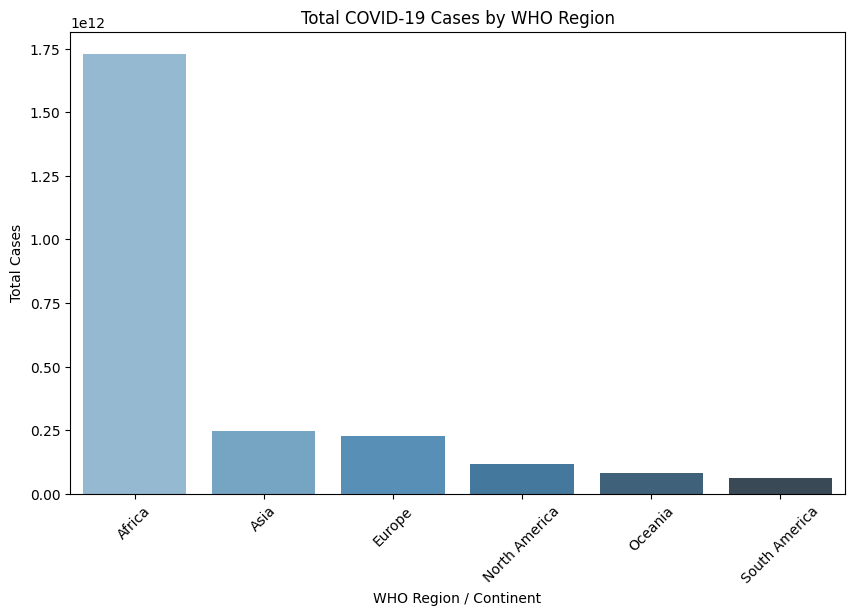

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_summary, x='continent', y='total_cases', palette='Blues_d')
plt.title('Total COVID-19 Cases by WHO Region')
plt.ylabel('Total Cases')
plt.xlabel('WHO Region / Continent')
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3067525151.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_summary, x='continent', y='total_deaths', palette='Reds_d')


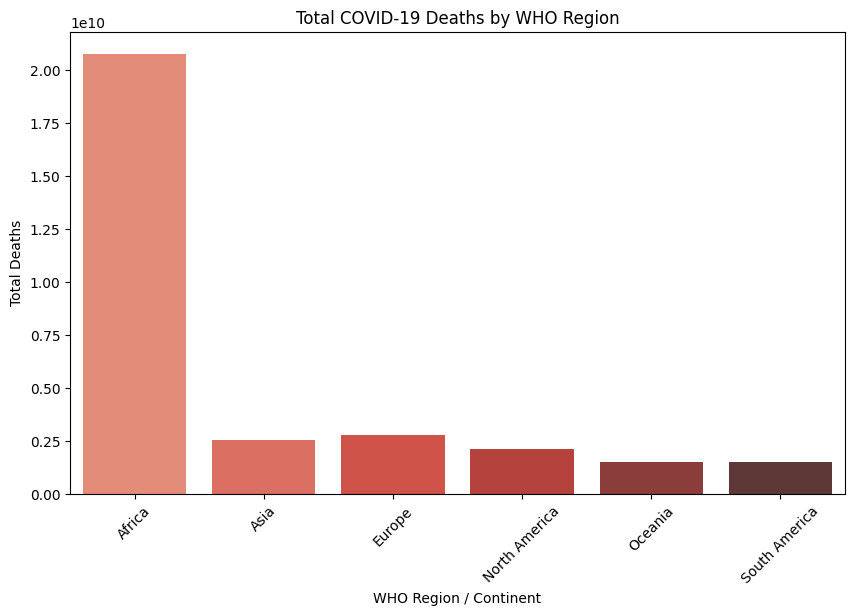

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=region_summary, x='continent', y='total_deaths', palette='Reds_d')
plt.title('Total COVID-19 Deaths by WHO Region')
plt.ylabel('Total Deaths')
plt.xlabel('WHO Region / Continent')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 3.2. Explore the world wide monthly trend of  COVID-19 cases using a line plot.
# Create a 'year_month' column
df_cleaned['year_month'] = df_cleaned['date'].dt.to_period('M')
# print(df_cleaned['year_month'].info())

# Group by month and sum cases
monthly_cases = df_cleaned.groupby('year_month')['total_cases'].sum().reset_index()

# Convert back to datetime for plotting
monthly_cases['year_month'] = monthly_cases['year_month'].dt.to_timestamp()
# print(monthly_cases.info())

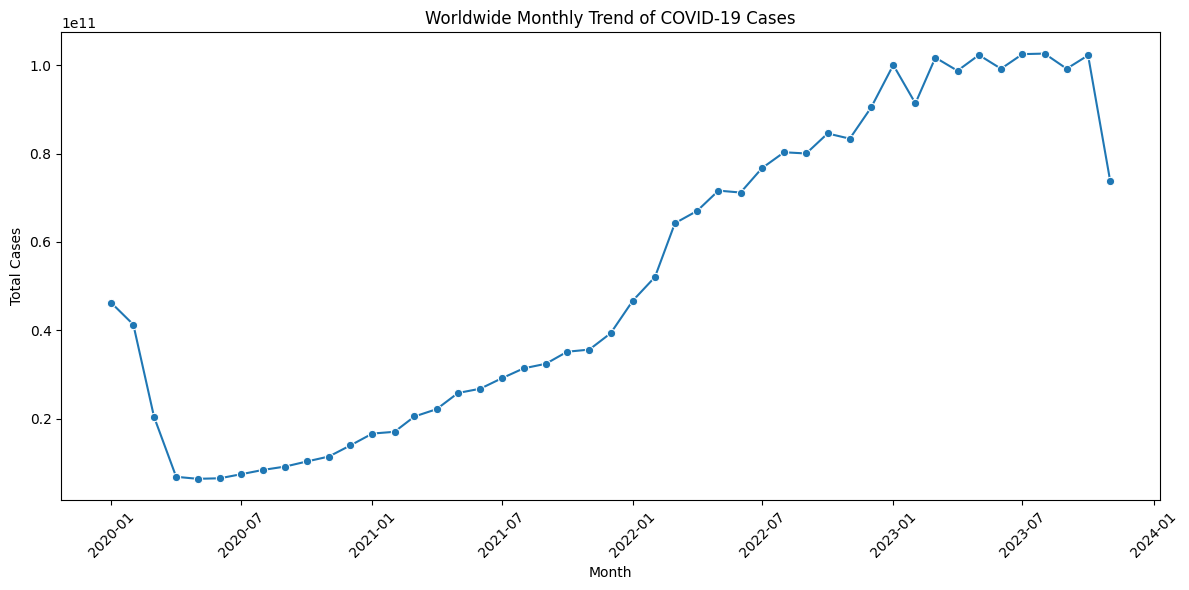

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cases, x='year_month', y='total_cases', marker='o')
plt.title('Worldwide Monthly Trend of COVID-19 Cases')
plt.xlabel('Month')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 3.3. Investigate the correlation between total cases and total deaths using a heatmap.
data_corr = df_cleaned[['total_cases', 'total_deaths']]
correlation_matrix = data_corr.corr()
print(correlation_matrix)

              total_cases  total_deaths
total_cases      1.000000      0.937965
total_deaths     0.937965      1.000000


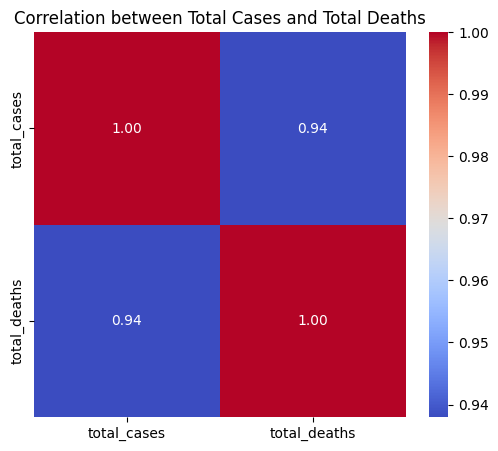

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Total Cases and Total Deaths')
plt.show()

In [ ]:
# 3.4. Analyze how total cases have evolved over time for a specific location (e.g., India).

country_df = df_cleaned[df_cleaned['location'] == 'India']

# Aggregate total cases by date (in case there are multiple rows per date)
daily_cases = country_df.groupby('date')['total_cases'].sum().reset_index()
print(daily_cases.head())


        date   total_cases
0 2020-01-03  6.862419e+06
1 2020-01-04  6.862419e+06
2 2020-01-05  6.862419e+06
3 2020-01-06  6.862419e+06
4 2020-01-07  6.862419e+06


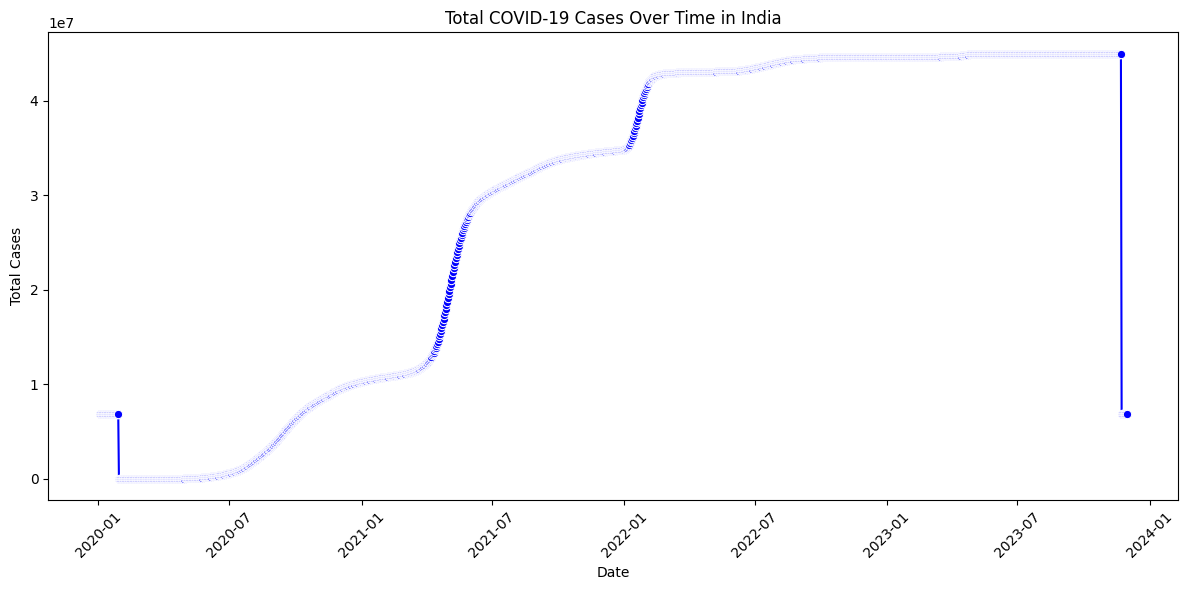

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_cases, x='date', y='total_cases', marker='o', color='blue')
plt.title('Total COVID-19 Cases Over Time in India')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
"""
Milestone-3
Activity 4: Regional Analysis Unveiling regional nuances in COVID-19 dynamics and identifying patterns in case distribution and
            fatality across time and continents.

"""
# 4.1. Create a grouped bar chart to visualize new cases by continent and month.

monthly_cases = df_cleaned.groupby(['continent', 'year_month'])['new_cases'].sum().reset_index()
print(monthly_cases.head())


  continent year_month  new_cases
0    Africa    2020-01    29584.0
1    Africa    2020-02   225058.0
2    Africa    2020-03  2441266.0
3    Africa    2020-04  7170448.0
4    Africa    2020-05  8945605.0


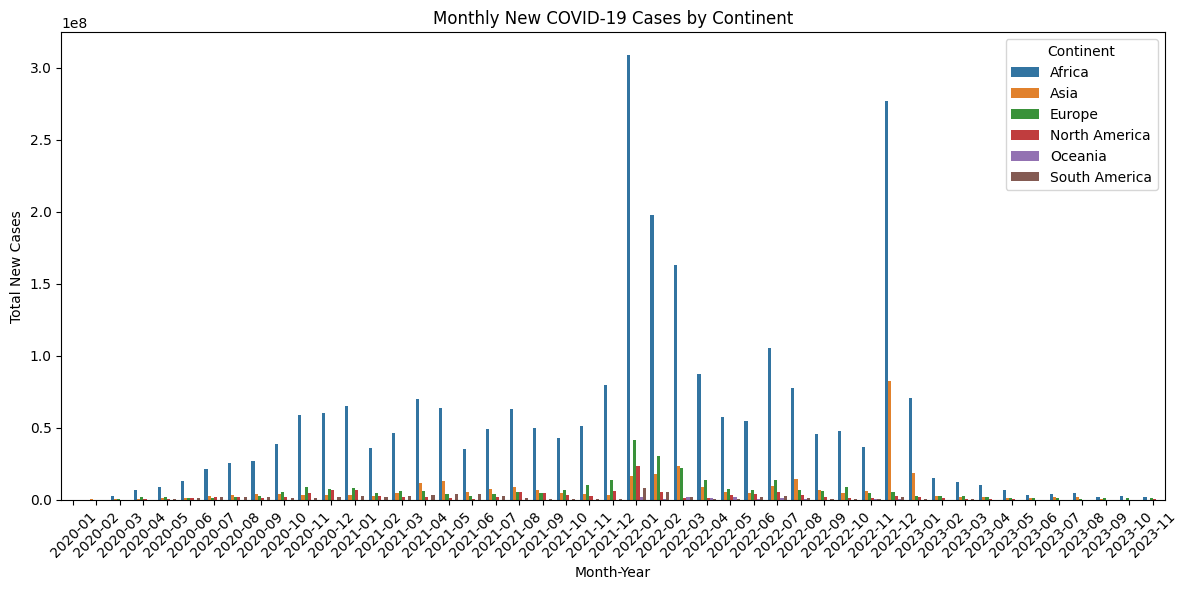

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_cases, x='year_month', y='new_cases', hue='continent')
plt.title('Monthly New COVID-19 Cases by Continent')
plt.xlabel('Month-Year')
plt.ylabel('Total New Cases')
plt.legend(title='Continent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1457078665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='year', y='total_cases', palette='viridis')


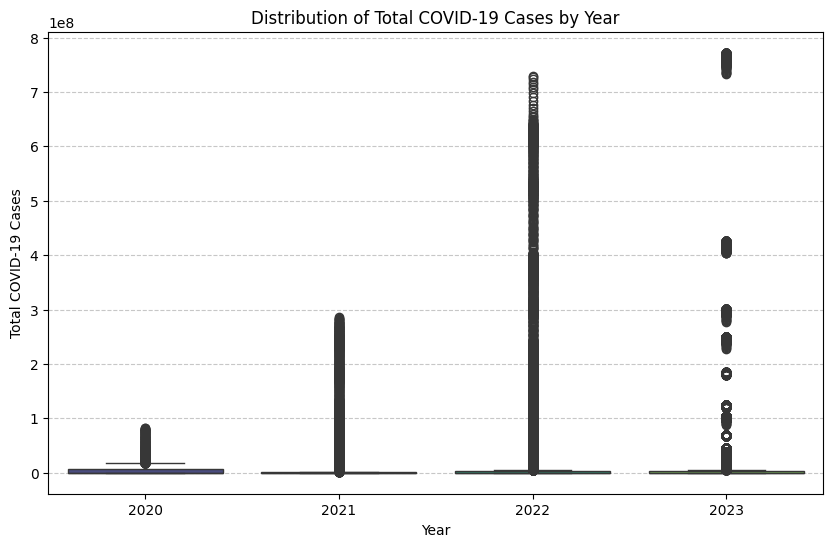

In [ ]:
# 4.2. Visualize the distribution of total COVID-19 cases by year using a box plot.
plt.figure(figsize=(10,6))

sns.boxplot(data=df_cleaned, x='year', y='total_cases', palette='viridis')
plt.title('Distribution of Total COVID-19 Cases by Year')
plt.xlabel('Year')
plt.ylabel('Total COVID-19 Cases')
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [ ]:
#4.3. Compare total deaths across different continents using a bar plot
continent_deaths = df_cleaned.groupby('continent')['total_deaths'].sum().reset_index()
print(continent_deaths)

       continent  total_deaths
0         Africa  2.077518e+10
1           Asia  2.525415e+09
2         Europe  2.778771e+09
3  North America  2.125727e+09
4        Oceania  1.477310e+09
5  South America  1.520126e+09


/tmp/ipython-input-3012400218.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=continent_deaths, x='continent', y='total_deaths', palette='magma')


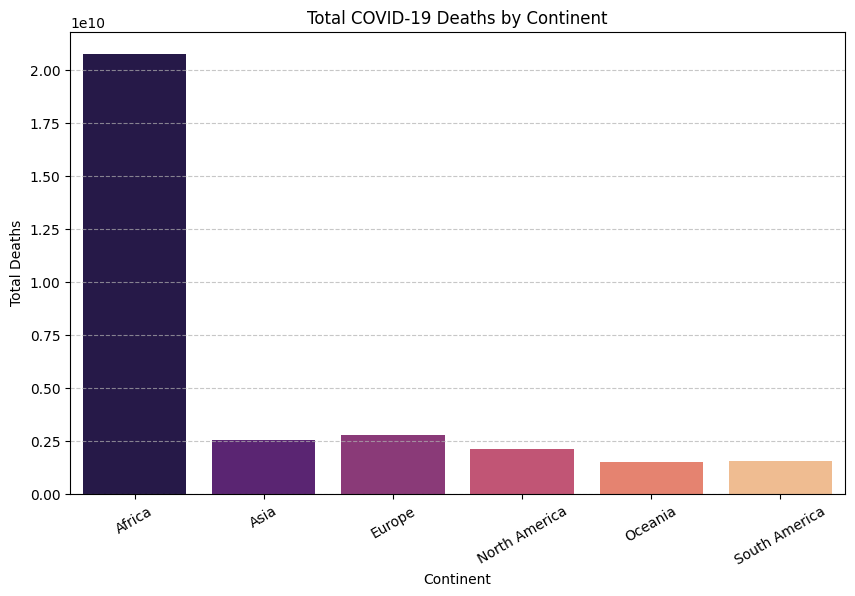

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=continent_deaths, x='continent', y='total_deaths', palette='magma')
plt.title('Total COVID-19 Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Deaths')
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)


In [ ]:
#4.4. Analyze the total cases on a month-by-month basis using a bar plot.
monthly_cases = df_cleaned.groupby('year_month')['total_cases'].sum().reset_index()
print(monthly_cases.head())

  year_month   total_cases
0    2020-01  4.623913e+10
1    2020-02  4.130453e+10
2    2020-03  2.043716e+10
3    2020-04  6.876284e+09
4    2020-05  6.421527e+09


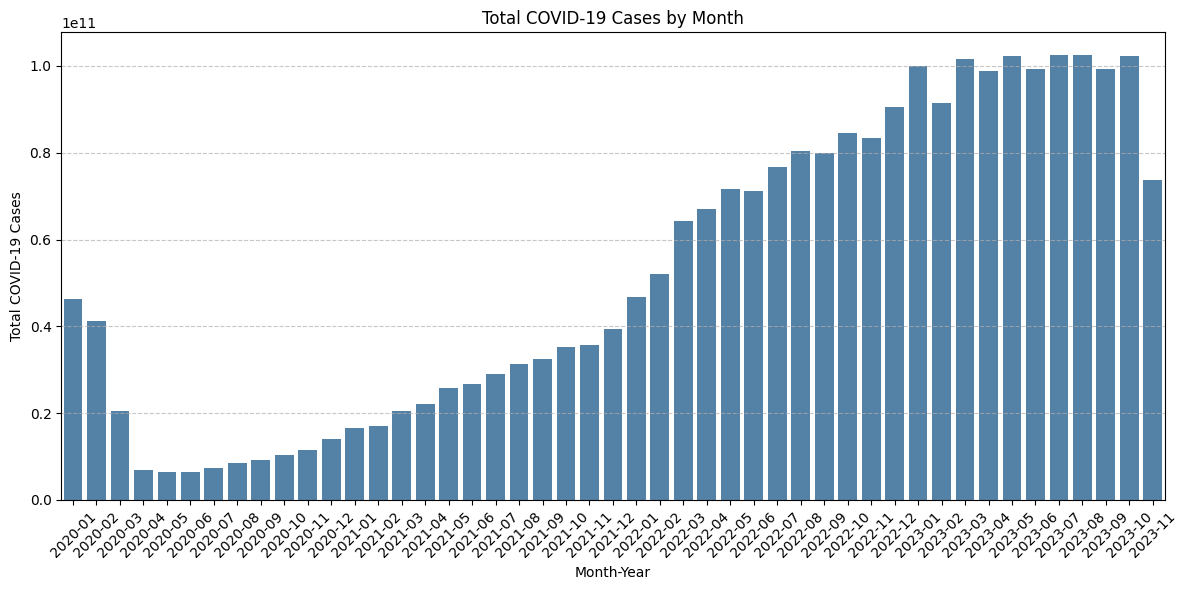

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=monthly_cases, x='year_month', y='total_cases', color='steelblue')
plt.title('Total COVID-19 Cases by Month')
plt.xlabel('Month-Year')
plt.ylabel('Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
"""
Activity 5: Time Series Analysis Capturing the daily dynamics of COVID-19, assessing the impact of vaccination, and
            monitoring testing metrics for a comprehensive global overview.

"""
# 5.1. Explore the daily trend of new cases and new deaths globally using line plots.
daily_trend = df_cleaned.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()
print(daily_trend.head())

        date     new_cases  new_deaths
0 2020-01-01  18751.011265  167.031072
1 2020-01-02  18751.011265  167.031072
2 2020-01-03      0.000000    0.000000
3 2020-01-04     14.000000    0.000000
4 2020-01-05   9375.505633   15.000000


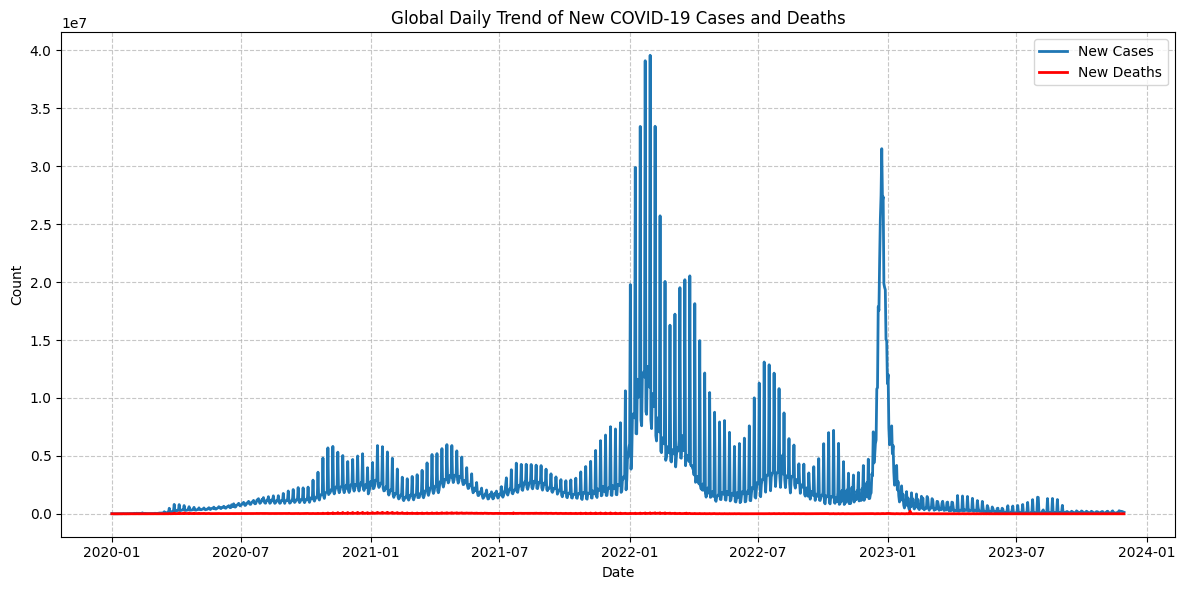

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_trend, x='date', y='new_cases', label='New Cases', linewidth=2)
sns.lineplot(data=daily_trend, x='date', y='new_deaths', label='New Deaths', linewidth=2, color='red')
plt.title('Global Daily Trend of New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 5.2. Calculate and visualize the daily average new cases and deaths globally.
daily_avg = df_cleaned.groupby('date')[['new_cases', 'new_deaths']].mean().reset_index()
print(daily_avg.head())

        date    new_cases  new_deaths
0 2020-01-01  9375.505633   83.515536
1 2020-01-02  9375.505633   83.515536
2 2020-01-03     0.000000    0.000000
3 2020-01-04     0.056911    0.000000
4 2020-01-05    38.111812    0.060976


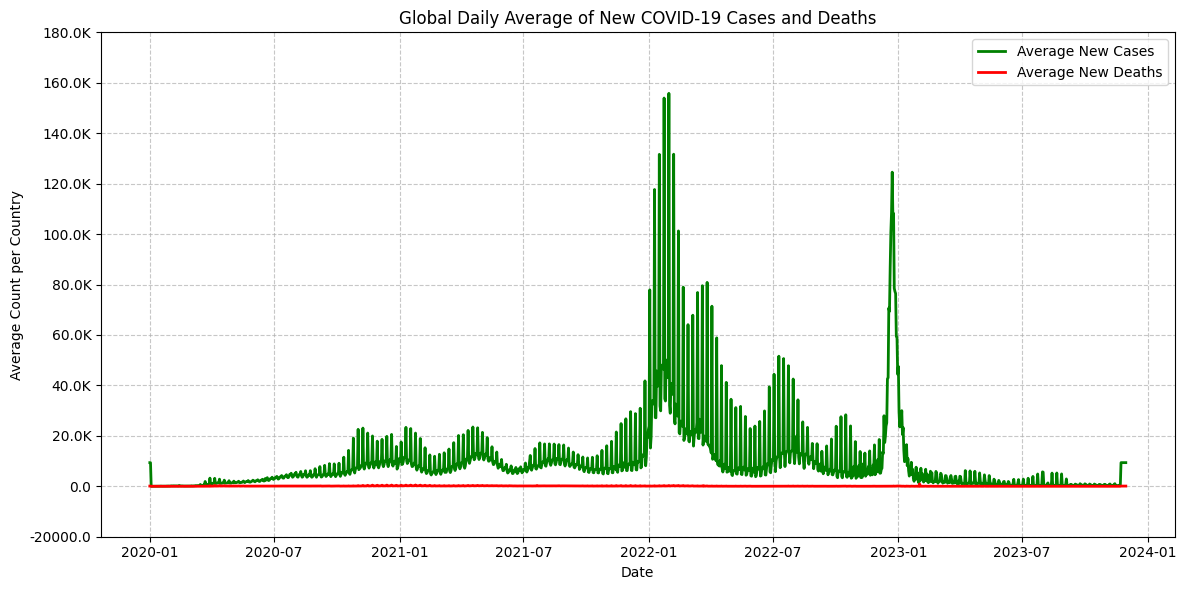

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=daily_avg, x='date', y='new_cases', label='Average New Cases', linewidth=2, color='green')
sns.lineplot(data=daily_avg, x='date', y='new_deaths', label='Average New Deaths', linewidth=2, color='red')

# Get current tick locations
tick_locations = plt.yticks()[0]
# Function to format large numbers
def format_large_numbers(tick_val):
    if tick_val >= 1e9:
        return f'{tick_val / 1e9:.1f}B'
    elif tick_val >= 1e6:
        return f'{tick_val / 1e6:.1f}M'
    elif tick_val >= 1e3:
        return f'{tick_val / 1e3:.1f}K'
    else:
        return str(tick_val)
# Generate formatted labels
formatted_labels = [format_large_numbers(val) for val in tick_locations]
# Set the new tick labels
plt.yticks(tick_locations, formatted_labels)
plt.title('Global Daily Average of New COVID-19 Cases and Deaths')
plt.xlabel('Date')
plt.ylabel('Average Count per Country')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# 5.3. Explore the trend of vaccination coverage over time globally.
global_vax = df_cleaned.groupby('date')['people_vaccinated'].sum().reset_index()
print(global_vax.head())

        date  people_vaccinated
0 2020-01-01       4.101988e+08
1 2020-01-02       4.101988e+08
2 2020-01-03       5.045445e+10
3 2020-01-04       5.045445e+10
4 2020-01-05       5.045445e+10


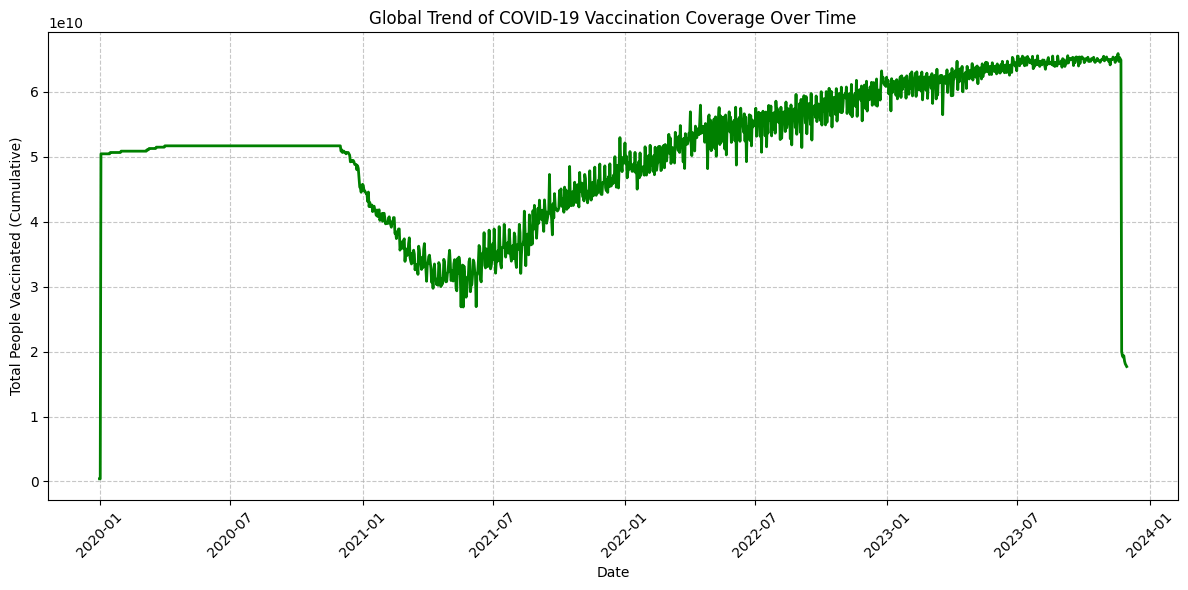

In [ ]:
# Create a line plot to visualize the trend of vaccination coverage over time globally.
plt.figure(figsize=(12,6))
sns.lineplot(data=global_vax, x='date', y='people_vaccinated', color='green', linewidth=2)
plt.title('Global Trend of COVID-19 Vaccination Coverage Over Time')
plt.xlabel('Date')
plt.ylabel('Total People Vaccinated (Cumulative)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 5.4. Analyze the total tests and positive rate over time globally.
global_tests = df_cleaned.groupby('date')[['total_tests', 'positive_rate']].mean().reset_index()
print(global_tests.head())

        date   total_tests  positive_rate
0 2020-01-01  1.450000e+01       0.098163
1 2020-01-02  9.800000e+01       0.098163
2 2020-01-03  2.093299e+07       0.098163
3 2020-01-04  2.084720e+07       0.098163
4 2020-01-05  2.084720e+07       0.098163


Text(0.5, 0.98, 'Global Trend of Total Tests and Positive Rate Over Time')

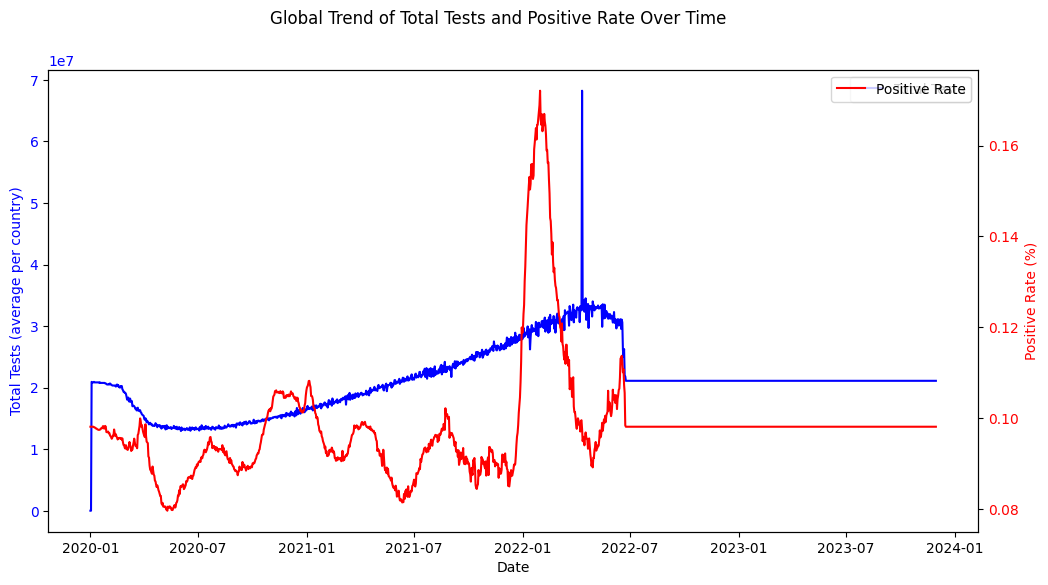

In [ ]:
# Create a dual-axis plot for better comparison
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot total tests (left axis)
sns.lineplot(data=global_tests, x='date', y='total_tests', color='blue', ax=ax1, label='Total Tests')
ax1.set_xlabel('Date')
ax1.set_ylabel('Total Tests (average per country)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create second axis for positive rate (right axis)
ax2 = ax1.twinx()
sns.lineplot(data=global_tests, x='date', y='positive_rate', color='red', ax=ax2, label='Positive Rate')
ax2.set_ylabel('Positive Rate (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.suptitle('Global Trend of Total Tests and Positive Rate Over Time', fontsize=12)

In [ ]:
"""
Milestone-4
Activity 6: In-Depth Country Analysis Conducting an in-depth examination of specific countries, understanding the correlation between
            cases and deaths globally, and exploring continental variations in case distribution.

"""
# 6.1. Visualize the total COVID-19 cases and deaths over time for a specific country.
country_name = 'China'   # ← change this to your desired country

# Filter dataset for that country
country_df = df_cleaned[df_cleaned['location'] == country_name].copy()

# Convert date column to datetime
country_df['date'] = pd.to_datetime(country_df['date']) # ← to convert'date' into standardized pandas datetime objects for working with time-series data and performing date-related operations in pandas.

print(country_df[['location']].head())

      location
62516    China
62517    China
62518    China
62519    China
62520    China


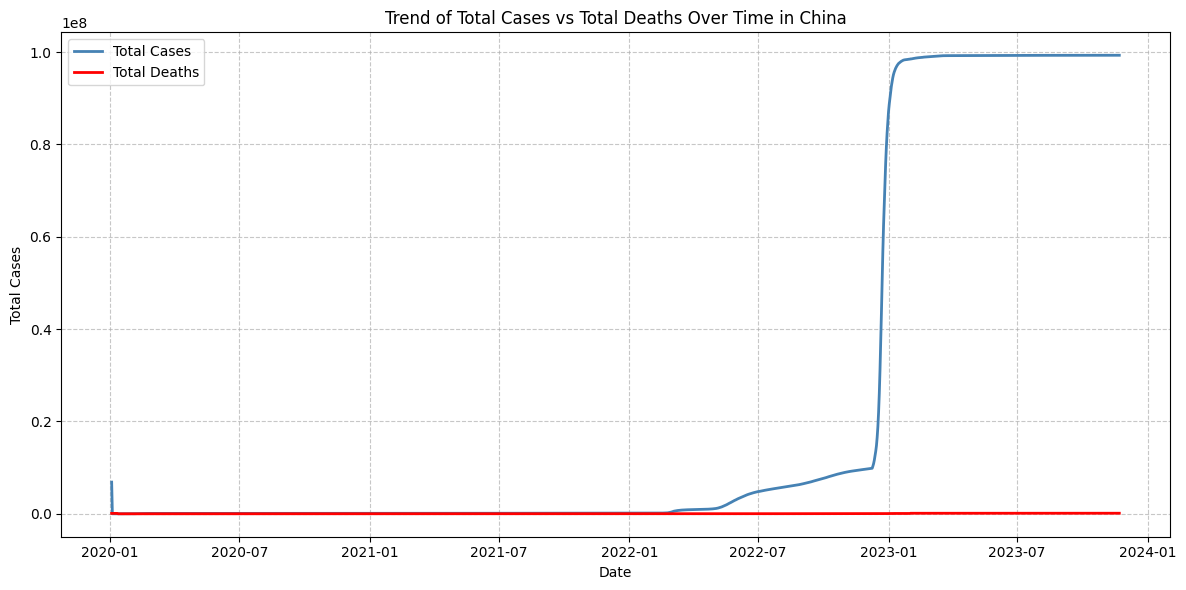

In [ ]:
#  Plot total cases and deaths over time
plt.figure(figsize=(12,6))

sns.lineplot(data=country_df, x='date', y='total_cases', label='Total Cases', linewidth=2, color='steelblue')
sns.lineplot(data=country_df, x='date', y='total_deaths', label='Total Deaths', linewidth=2, color='red')
plt.title(f'Trend of Total Cases vs Total Deaths Over Time in {country_name}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 6.2. Get user input for the country and metric (total_cases or total_deaths) and plot a line chart for the user selected values.
country_name=input("enter the country name: ")

# Filter dataset for that country
country_df = df_cleaned[df_cleaned['location'] == country_name].copy()

# Convert date column to datetime
country_df['date'] = pd.to_datetime(country_df['date'])
print(country_df[['location']].head())

enter the country name: Singapore
         location
288102  Singapore
288103  Singapore
288104  Singapore
288105  Singapore
288106  Singapore


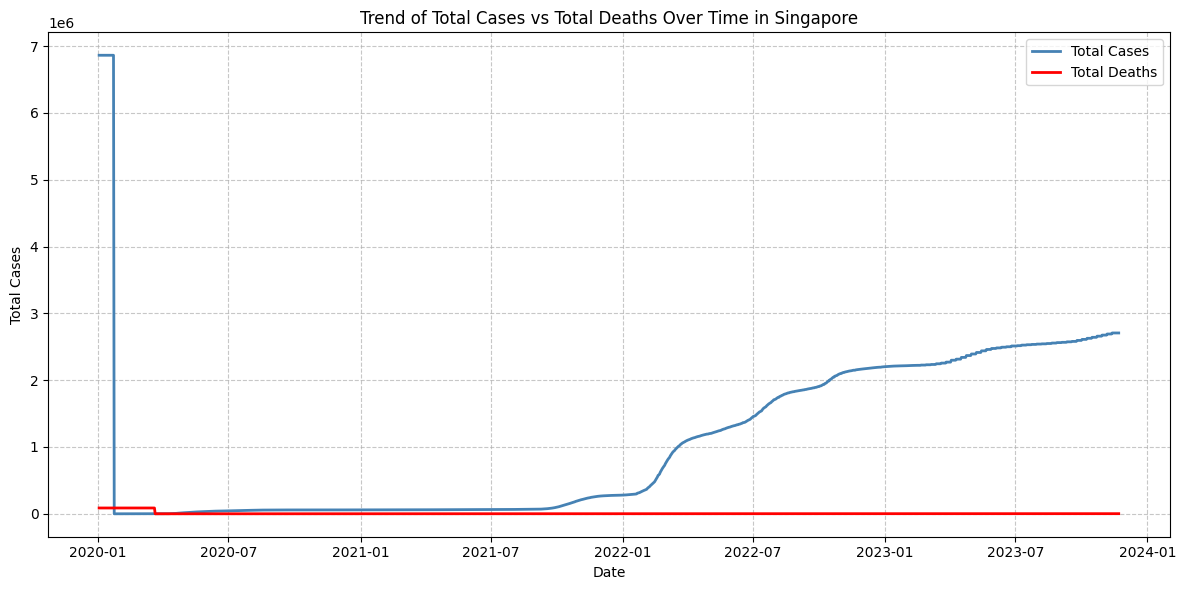

In [ ]:
#  Plot total cases and deaths over time
plt.figure(figsize=(12,6))

sns.lineplot(data=country_df, x='date', y='total_cases', label='Total Cases', linewidth=2, color='steelblue')
sns.lineplot(data=country_df, x='date', y='total_deaths', label='Total Deaths', linewidth=2, color='red')
plt.title(f'Trend of Total Cases vs Total Deaths Over Time in {country_name}')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1803313877.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='continent', y='total_cases', palette='Set2')


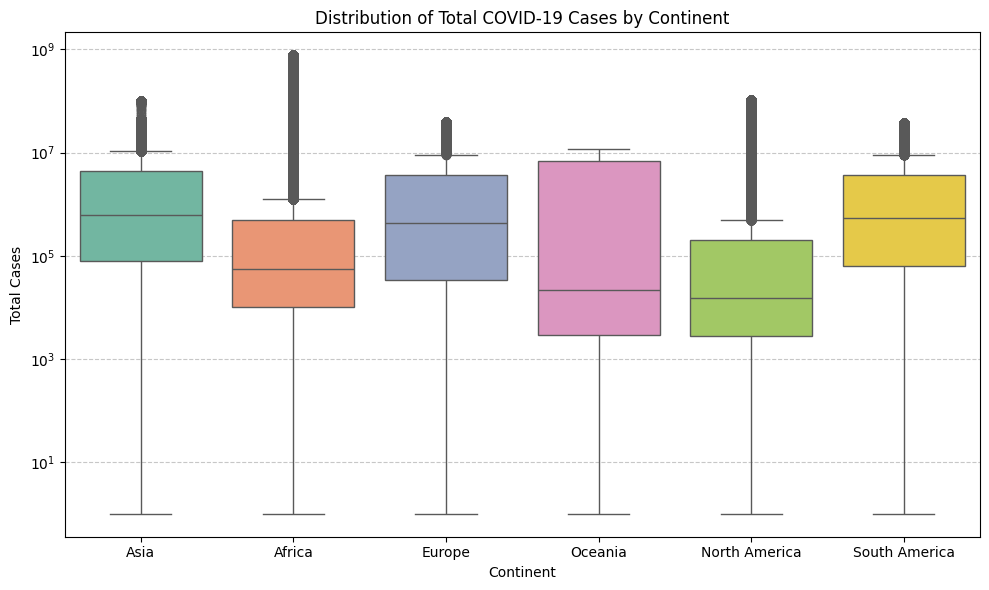

In [ ]:
# 6.3. Analyze the distribution of total cases across different continents using a box plot.
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cleaned, x='continent', y='total_cases', palette='Set2')

# Add titles and labels
plt.title('Distribution of Total COVID-19 Cases by Continent')
plt.xlabel('Continent')
plt.ylabel('Total Cases')
plt.yscale('log')  # Optional: use log scale if values vary widely
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
# 6.4. Visualize the Year wise monthly trend of new COVID-19 cases for user selected country.
country_name=input("enter the country name: ")
monthly_cases = df_cleaned.groupby(['year','month'])['new_cases'].sum().reset_index()
print(monthly_cases.head())

enter the country name: india
   year  month     new_cases
0  2020      1  2.832041e+05
1  2020      2  9.279079e+05
2  2020      3  4.389639e+06
3  2020      4  1.105833e+07
4  2020      5  1.351039e+07


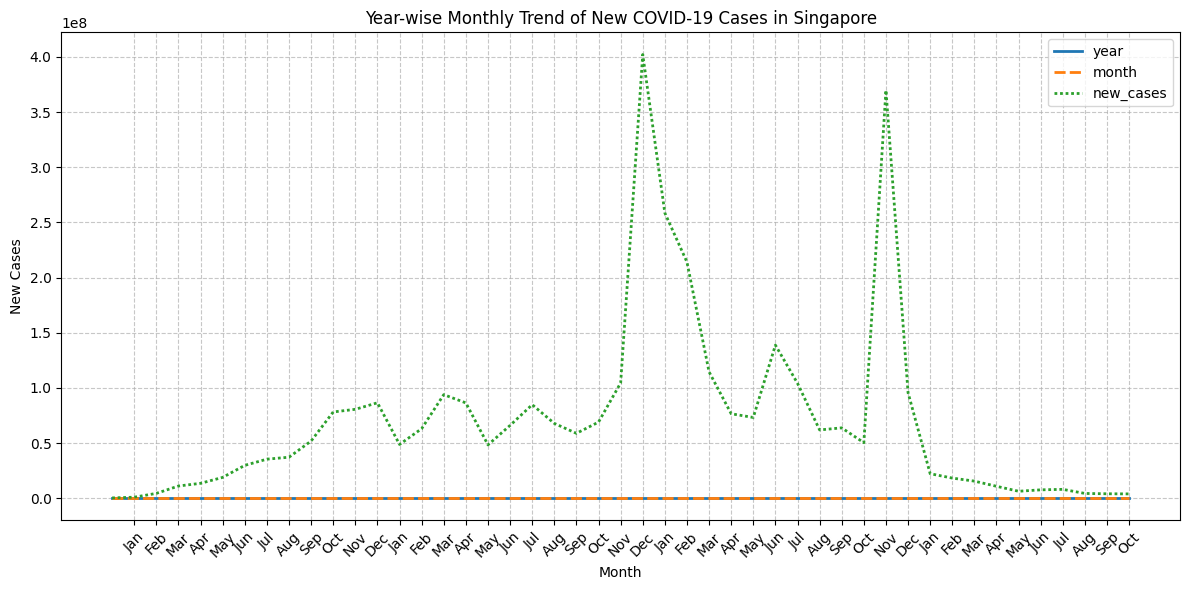

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_cases, palette='tab10', linewidth=2)
plt.title(f'Year-wise Monthly Trend of New COVID-19 Cases in {country_name}')
plt.xlabel('Month')
plt.ylabel('New Cases')
plt.xticks(rotation=45)
plt.xticks(ticks=range(1,47), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct'])
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


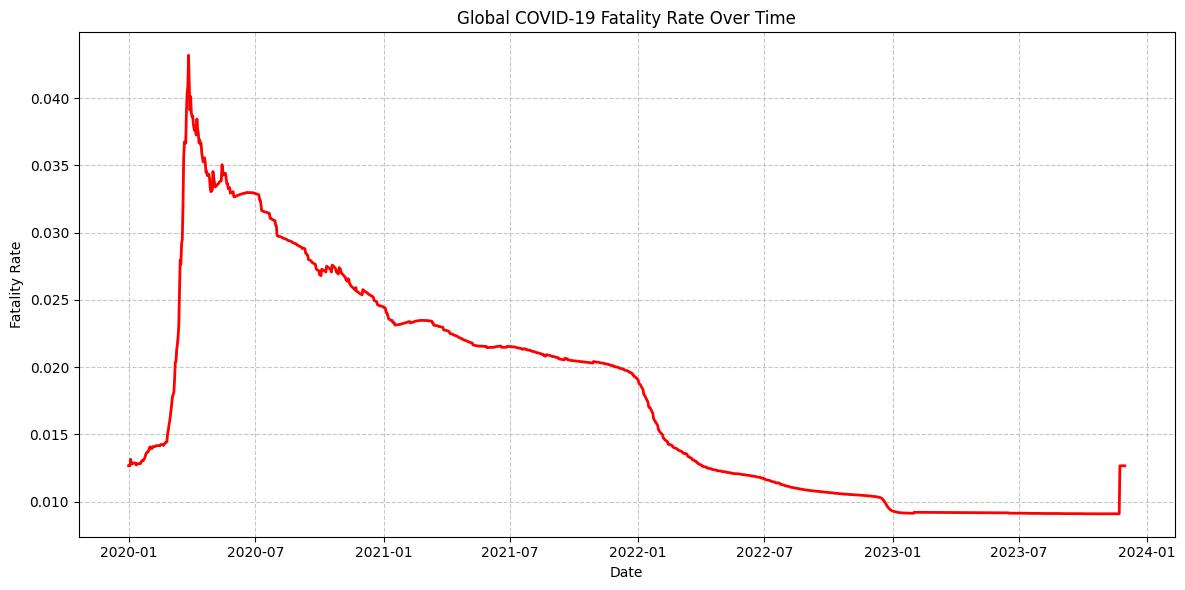

In [ ]:
"""
Activity 7: Additional Insights Extracting additional insights, examining the influence of external factors, and
            evaluating regional disparities for a holistic understanding of the COVID-19 landscape.

"""
# 7.1. Visualize the fatality rate (total deaths / total cases) over time globally.
daily_global = df_cleaned.groupby('date')[['total_cases', 'total_deaths']].sum().reset_index()
daily_global['fatality_rate'] = daily_global['total_deaths'] / daily_global['total_cases']

# Plot fatality rate over time

plt.figure(figsize=(12,6))
sns.lineplot(data=daily_global, x='date', y='fatality_rate', color='red', linewidth=2)
plt.title('Global COVID-19 Fatality Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Fatality Rate')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


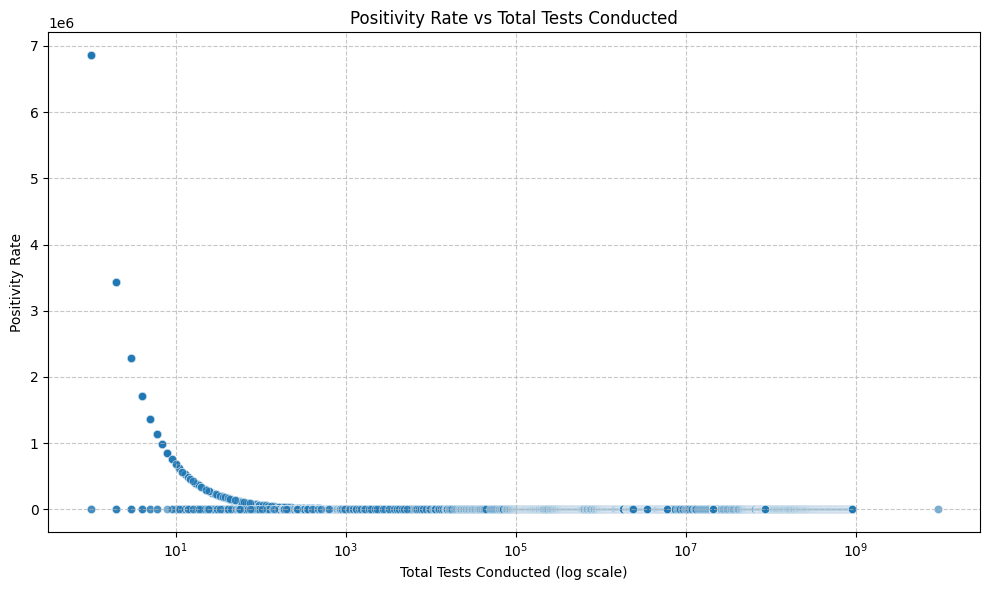

In [ ]:
# 7.2. Explore positivity rate (total_cases/ total tests) verses total tests conducted to analyse testing effectiveness use x axis
#      as logarithmic scale for better visualization.
df_cleaned['positivity_rate'] = df_cleaned['total_cases'] / df_cleaned['total_tests']

# 1️⃣ Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='total_tests', y='positivity_rate', alpha=0.6)

# 2️⃣ Set x-axis to logarithmic scale due to wide range of values
plt.xscale('log')

# 3️⃣ Add titles and labels
plt.title('Positivity Rate vs Total Tests Conducted')
plt.xlabel('Total Tests Conducted (log scale)')
plt.ylabel('Positivity Rate')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

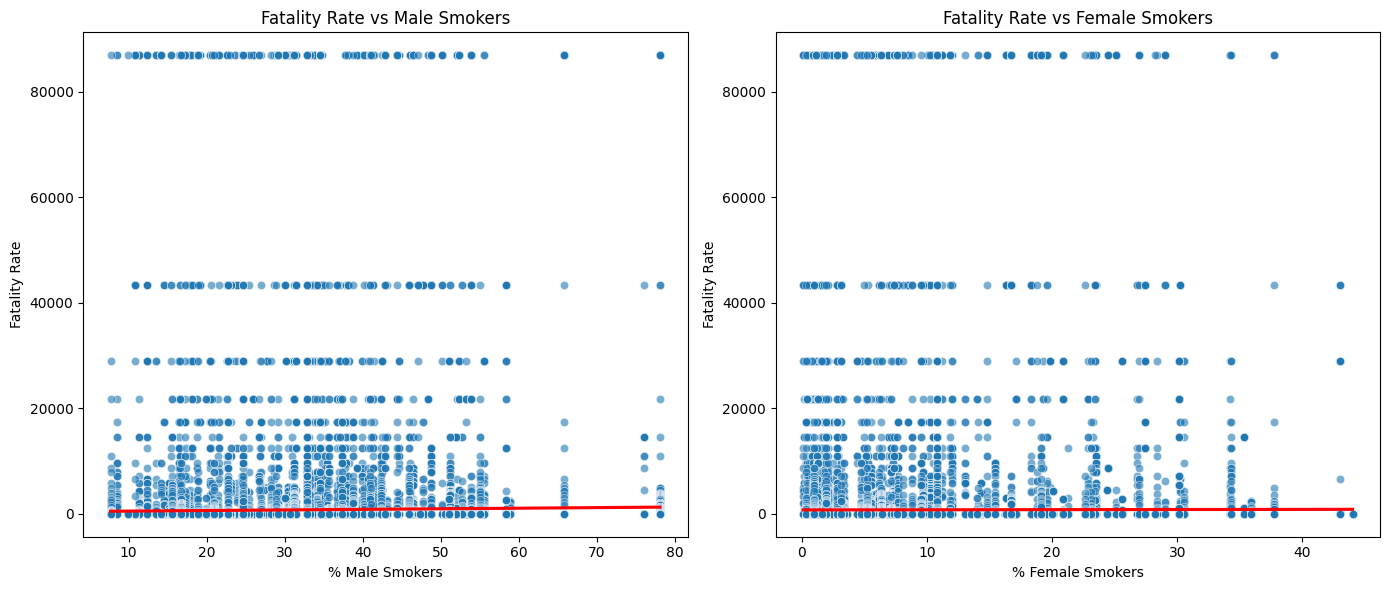

In [ ]:
# 7.3. Analyze fatality rate and its relationship with smoking (Use male_smokers and female_smokers columns)

# 1️⃣ Remove rows with missing values in relevant columns
df_analysis = df_cleaned.dropna(subset=['total_cases', 'total_deaths', 'male_smokers', 'female_smokers'])

# 2️⃣ Calculate fatality rate
df_analysis['fatality_rate'] = df_analysis['total_deaths'] / df_analysis['total_cases']

# 3️⃣ Create scatter plots and linear regression -> to visualize correlation between two continuous variables and
#     to see trends and relaitonships.
plt.figure(figsize=(14,6))

# Male smokers
plt.subplot(1,2,1)
sns.scatterplot(data=df_analysis, x='male_smokers', y='fatality_rate', alpha=0.6)
sns.regplot(data=df_analysis, x='male_smokers', y='fatality_rate', scatter=False, color='red')
plt.title('Fatality Rate vs Male Smokers')
plt.xlabel('% Male Smokers')
plt.ylabel('Fatality Rate')

# Female smokers
plt.subplot(1,2,2)
sns.scatterplot(data=df_analysis, x='female_smokers', y='fatality_rate', alpha=0.6)
sns.regplot(data=df_analysis, x='female_smokers', y='fatality_rate', scatter=False, color='red')
plt.title('Fatality Rate vs Female Smokers')
plt.xlabel('% Female Smokers')
plt.ylabel('Fatality Rate')
plt.tight_layout()
plt.show()


                            fatality_rate  hospital_beds_per_thousand
fatality_rate                    1.000000                    0.007356
hospital_beds_per_thousand       0.007356                    1.000000


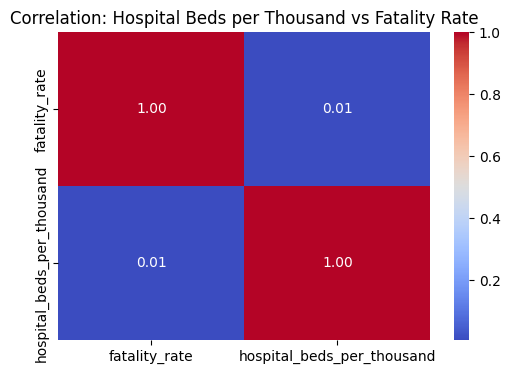

In [ ]:
# 7.4. Create a heatmap to analyze the relationship between hospital beds per thousand and fatality rate.
df_analysis = df_cleaned.dropna(subset=['total_cases', 'total_deaths', 'hospital_beds_per_thousand'])

# 1️⃣ Calculate fatality rate
df_analysis['fatality_rate'] = df_analysis['total_deaths'] / df_analysis['total_cases']

# 2️⃣ Create a correlation matrix
corr_matrix = df_analysis[['fatality_rate','hospital_beds_per_thousand']].corr()
print(corr_matrix)

# 3️⃣ Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation: Hospital Beds per Thousand vs Fatality Rate')
plt.show()


In [ ]:
"""
This brings me to the end of my analysis.
Working on this project helped me improve my ability to use Python to manage messy data, uncover meaningful trends, and
communicate insights clearly.
Thank you.
"""